In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


Loads all the required Python libraries for data handling, model building, evaluation, and visualization.

In [2]:
# Load Iris dataset from uploaded file
df = pd.read_csv("Iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


 Reads the Iris dataset from the uploaded CSV file and displays the first 5 rows.

In [3]:
# Drop 'Id' and set 'Species' as target
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']


Separates the independent variables (X) from the dependent variable (y). Drops Id as it’s not useful for classification.

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Scales all features so they have equal weight in distance calculations (important for KNN).

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


Splits the dataset into training (80%) and testing (20%) sets for evaluation.

In [6]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

 Creates a KNN classifier with K=3 and fits it to the training data.

In [7]:
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


Uses the trained KNN model to predict test data and calculates how accurate the predictions are.



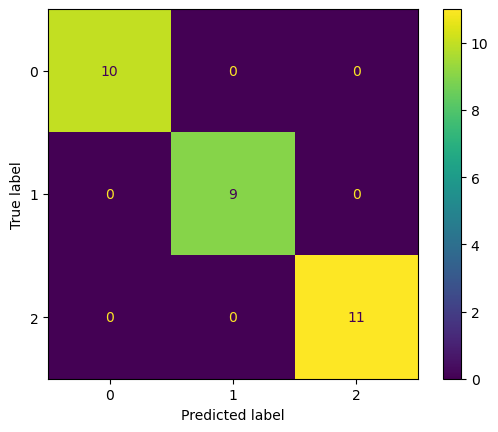

In [8]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()


Shows a confusion matrix to see how many predictions were correct or incorrect for each class.

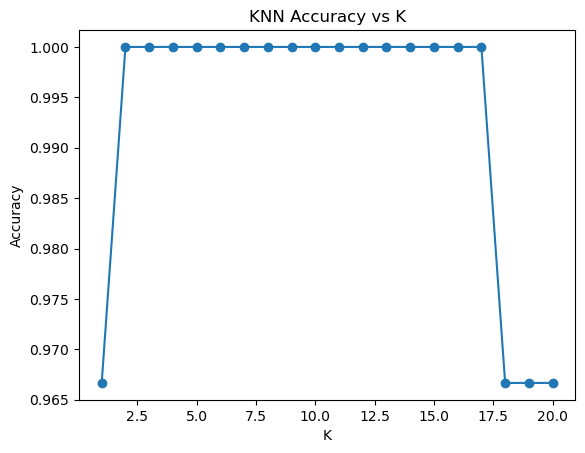

In [9]:
accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))

plt.plot(range(1, 21), accuracies, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs K')
plt.show()


Tests K values from 1 to 20 and plots accuracy for each, helping you choose the best K for the dataset.